In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [24]:
# Find the most recent date in the data set.
most_recent_date = (session.query(measurement.date)
                    .order_by(measurement.date.desc())
                    .first())

most_recent_date

('2017-08-23',)

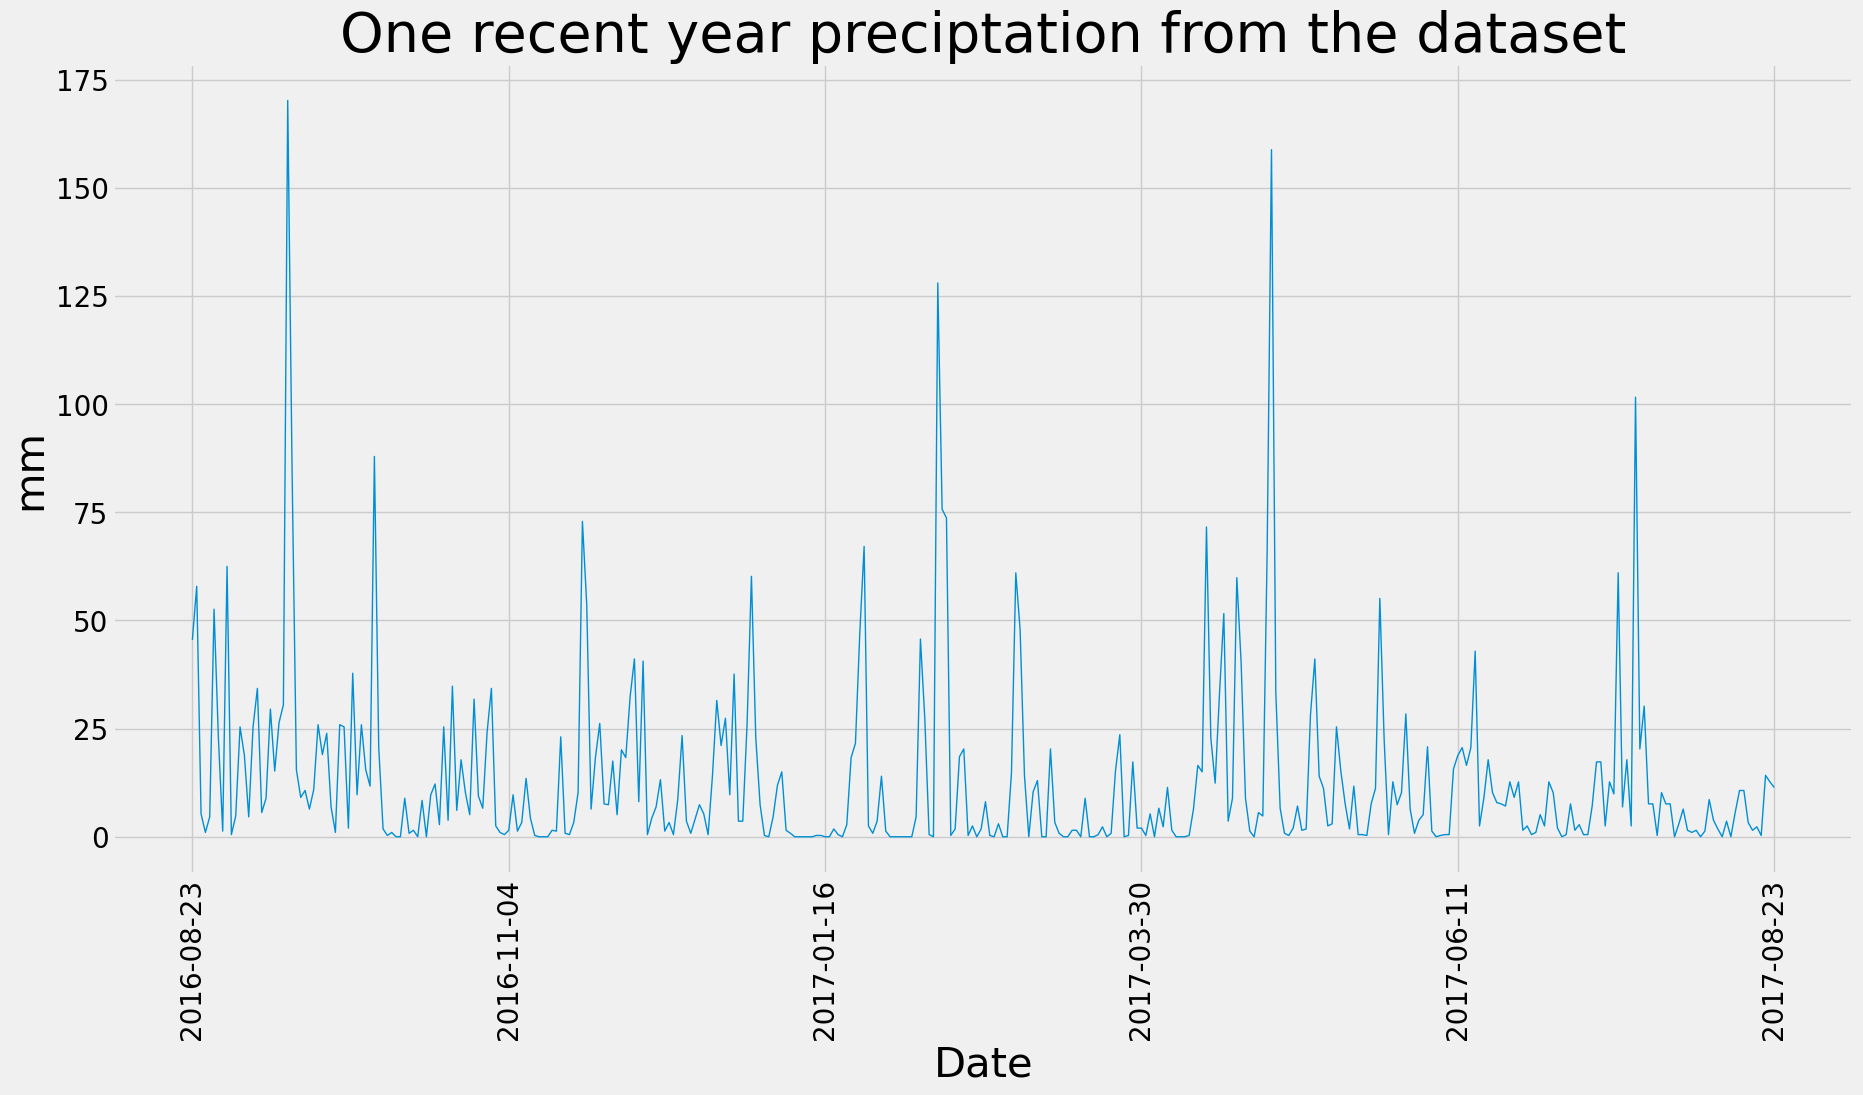

In [26]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago_date = dt.date(2017, 8, 23) - dt.timedelta(days=366)
# print(one_year_date)

# Perform a query to retrieve the data and precipitation scores
year_prcp = (session.query(measurement.date, func.max(measurement.prcp))
                  .filter(func.strftime('%Y-%m-%d', measurement.date) > one_year_ago_date)
                  .group_by(measurement.date)
                  .all())
# year_prcp

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(year_prcp, columns = ['date', 'precipitation'])
prcp_df.set_index('date',inplace=True)
# prcp_df.head(50)

# Sort the dataframe by date
prcp_df_sorted = prcp_df.sort_values('date')
prcp_df_sorted

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(linewidth = 1, xticks = (0,73,146,219,292,365), figsize = (20,10), fontsize = 20, legend = None)
plt.xticks(rotation='vertical')
plt.xlabel('Date', fontsize = 30)
plt.ylabel('mm', fontsize = 30)
plt.title('One recent year preciptation from the dataset', fontsize = 40)

plt.show()


In [36]:
# Use Pandas to calculate the summary statistics for the precipitation data

#Query data from the the last recent year
precipitatation = (session.query(measurement.date, measurement.prcp)
                  .filter(measurement.date > one_year_ago_date)
                  .all())

#Convert query into data frame
precipitatation_df = pd.DataFrame(precipitatation, columns = ['date', 'precipitation'])

#Remove empty rows
precipitatation_df.dropna()

#Calculate the summary statistics for the precipitation data
precipitatation_df.describe()


,precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [37]:
# Design a query to calculate the total number of stations in the dataset
total_station = session.query(station).count()
print(total_station)

9


In [49]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity=(session.query(measurement.station,func.count(measurement.station))
                         .group_by(measurement.station)
                         .order_by(func.count(measurement.station).desc())
                         .all())
station_activity


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [63]:
# # Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = (session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs))
                         .filter(measurement.station == 'USC00519281')
                         .all())
most_active_station

[(12.2, 29.4, 22.03582251082252)]

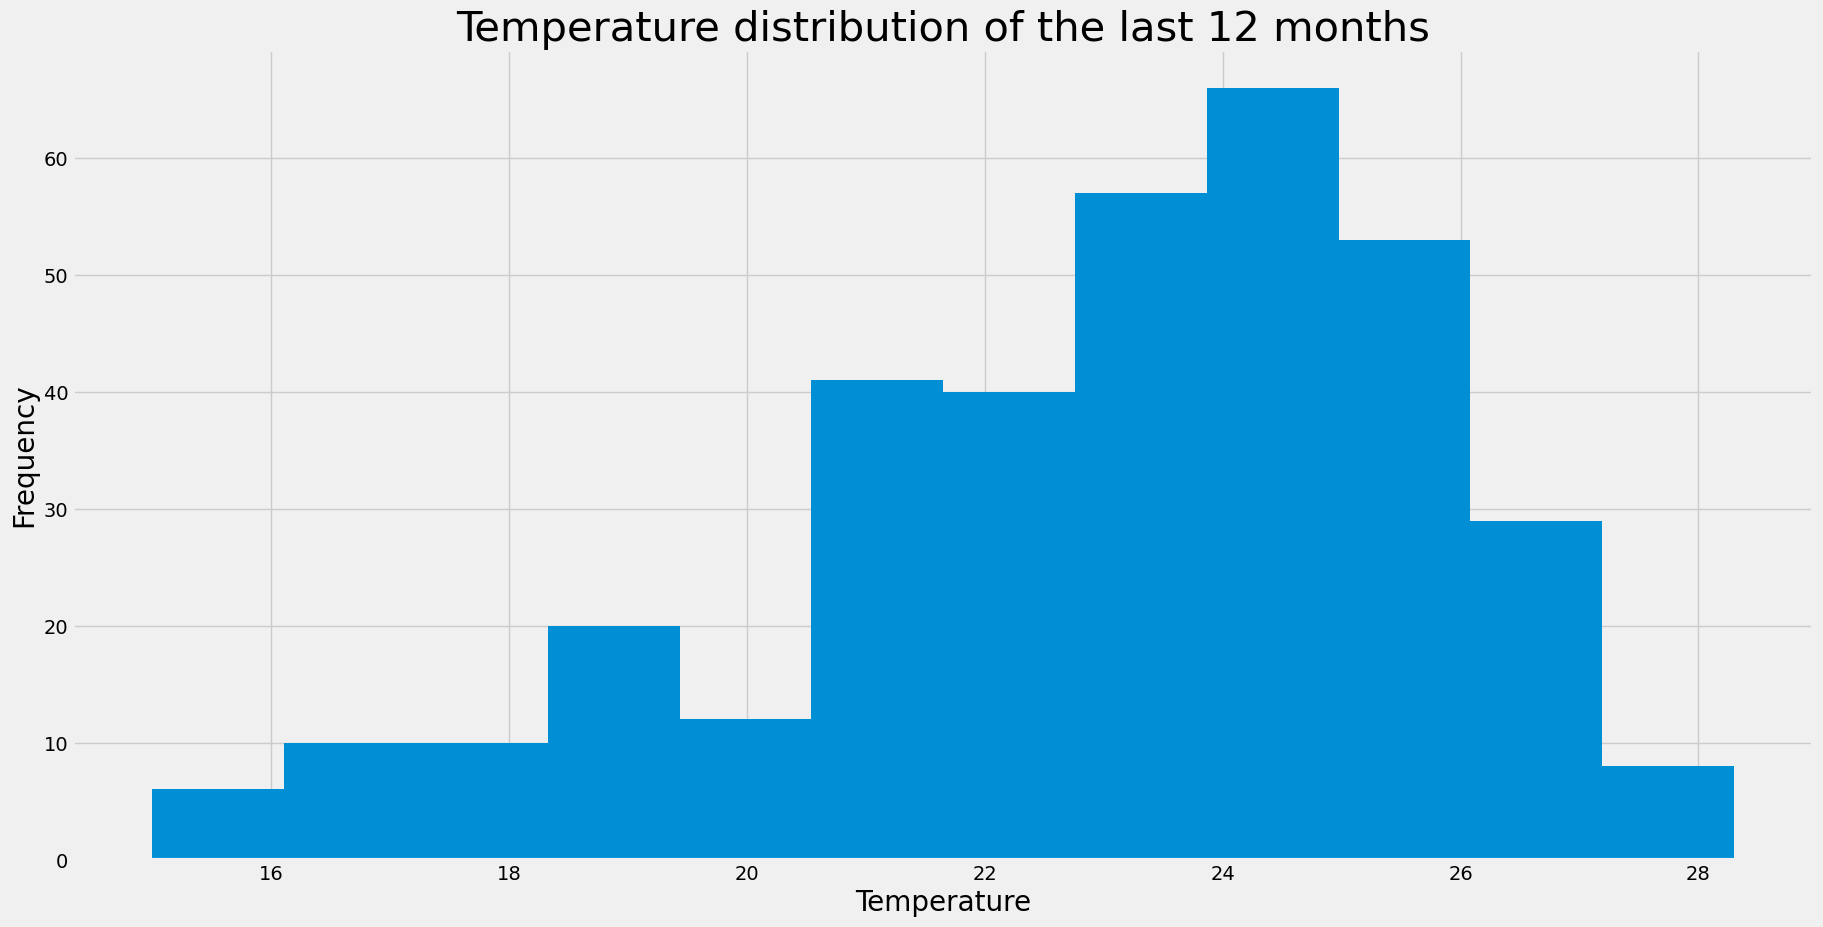

In [74]:
# Using the most active station id
# Query  observation data for this station and plot the results as a histogram
# Query temperature
last_year_temp = (session.query(measurement.date, measurement.tobs)
                  .filter(measurement.date > one_year_ago_date)
                  .filter(measurement.station == 'USC00519281')
                  .all())

# Convert to data frame
last_year_temp_df = pd.DataFrame(last_year_temp)
last_year_temp_df.set_index('date',inplace=True)
last_year_temp_df

# Create a histogram
last_year_temp_df.hist(figsize = (20,10), bins = 12)
plt.xlabel('Temperature', fontsize = 20)
plt.ylabel('Frequency', fontsize = 20)
plt.title('Temperature distribution of the last 12 months', fontsize = 30)

plt.show()

# Close Session

In [75]:
# Close Session
session.close()